# WORLD COVID NOVEL#

In [1]:
#LIBRARIES

#Visualisation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.basemap import Basemap
import requests
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
import calmap
import folium
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs


#Numerical Calculations
from scipy.stats import mode
import random
import numpy as np 
import pandas as pd
import re

# Time
import time
import datetime
from time import gmtime, strftime
from pytz import timezone



In [2]:
#TIME

fmt = "%a, %d %B %Y %H:%M:%S %Z%z"
pacific = timezone('Africa/Mbabane')
loc_dt = datetime.datetime.now()
print("Africa/Mbabane" + " : " + loc_dt.strftime(fmt))

Africa/Mbabane : Tue, 31 March 2020 17:58:47 


In [5]:
#READING DATA

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [6]:
merged_dataset = confirmed_df.merge(deaths_df, on="Country/Region")
merged_dataset.head()

,Province/State_x,Country/Region,Lat_x,Long_x,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,...,3/21/20_y,3/22/20_y,3/23/20_y,3/24/20_y,3/25/20_y,3/26/20_y,3/27/20_y,3/28/20_y,3/29/20_y,3/30/20_y
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,1,1,1,2,4,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,4,5,5,6,8,10,10,11
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,15,17,17,19,21,25,26,29,31,35
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,1,1,1,1,3,3,3,6,8
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


In [7]:
datePattern = re.compile("(\d{1,2}\/\d{1,2}\/\d{2,4})")  #pattern like 1/22/20
cols_to_keep = [ col for col in confirmed_df.columns if bool(re.match(datePattern, col)) ] +  ['Country/Region']



In [8]:
confirmed_df_sum = confirmed_df[cols_to_keep].groupby(['Country/Region']).sum().reset_index(drop=False)
print (confirmed_df_sum.head())


  Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...  3/21/20  3/22/20  3/23/20  3/24/20  \
0        0        0        0  ...       24       40       40       74   
1        0        0        0  ...       76       89      104      123   
2        0        0        0  ...      139      201      230      264   
3        0        0        0  ...       88      113      133      164   
4        0        0        0  ...        2        2        3        3   

   3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  
0       84       94      110      110      120      170  


In [9]:
deaths_df_sum = deaths_df[cols_to_keep].groupby(['Country/Region']).sum().reset_index(drop=False)
print (deaths_df_sum.head())

  Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...  3/21/20  3/22/20  3/23/20  3/24/20  \
0        0        0        0  ...        0        1        1        1   
1        0        0        0  ...        2        2        4        5   
2        0        0        0  ...       15       17       17       19   
3        0        0        0  ...        0        1        1        1   
4        0        0        0  ...        0        0        0        0   

   3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  
0        2        4        4        4        4        4  


In [10]:
# Pull column by index
# Select all rows, and 1st and last column
deaths_subset_df = deaths_df_sum.iloc[:,[ 0,-1]]

print (deaths_subset_df)

         Country/Region  3/30/20
0           Afghanistan        4
1               Albania       11
2               Algeria       35
3               Andorra        8
4                Angola        2
..                  ...      ...
173           Venezuela        3
174             Vietnam        0
175  West Bank and Gaza        1
176              Zambia        0
177            Zimbabwe        1

[178 rows x 2 columns]


In [11]:
recovered_df_sum = recovered_df[cols_to_keep].groupby(['Country/Region']).sum().reset_index(drop=False)
print (recovered_df_sum.head())

  Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...  3/21/20  3/22/20  3/23/20  3/24/20  \
0        0        0        0  ...        1        1        1        1   
1        0        0        0  ...        2        2        2       10   
2        0        0        0  ...       32       65       65       24   
3        0        0        0  ...        1        1        1        1   
4        0        0        0  ...        0        0        0        0   

   3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  
0        2        2        2        2        2        2  


In [12]:
full_df = confirmed_df_sum.iloc[:,[ 0,-1]].merge(recovered_df_sum.iloc[:,[ 0,-1]], how='outer', on='Country/Region' )

full_df = full_df.merge(deaths_df_sum.iloc[:,[ 0,-1]], how='outer', on='Country/Region' ) 

full_df.columns = ['Country/Region', 'Confirmed', 'Recovered', 'Deaths']


full_df.head()

,Country/Region,Confirmed,Recovered,Deaths
0,Afghanistan,170,2,4
1,Albania,223,44,11
2,Algeria,584,37,35
3,Andorra,370,10,8
4,Angola,7,0,2


In [13]:
full_df['Total'] = full_df.sum(axis=1)

full_df.head(5)

,Country/Region,Confirmed,Recovered,Deaths,Total
0,Afghanistan,170,2,4,176
1,Albania,223,44,11,278
2,Algeria,584,37,35,656
3,Andorra,370,10,8,388
4,Angola,7,0,2,9


In [14]:
full_df2 = pd.concat([confirmed_df_sum, recovered_df_sum, deaths_df_sum], sort=False)

datePattern = re.compile("(\d{1,2}\/\d{1,2}\/\d{2,4})")  #pattern like 1/22/20

cols_to_keep = [ col for col in full_df2.columns if bool(re.match(datePattern, col)) ] +  ['Country/Region']

full_df2 = full_df2[cols_to_keep].groupby(['Country/Region']).sum().reset_index(drop=False)

full_df2 = full_df2.merge(confirmed_df[['Country/Region', 'Lat', 'Long']], how='left', on='Country/Region')

full_df2.head()


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,Lat,Long
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,42,76,88,100,116,116,126,176,33.0000,65.0000
1,Albania,0,0,0,0,0,0,0,0,0,...,110,138,168,197,225,238,255,278,41.1533,20.1683
2,Algeria,0,0,0,0,0,0,0,0,0,...,312,307,388,421,464,514,573,656,28.0339,1.6596
3,Andorra,0,0,0,0,0,0,0,0,0,...,135,166,190,228,271,312,341,388,42.5063,1.5218
4,Angola,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,9,9,-11.2027,17.8739


C:\Users\tutun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

C:\Users\tutun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

C:\Users\tutun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



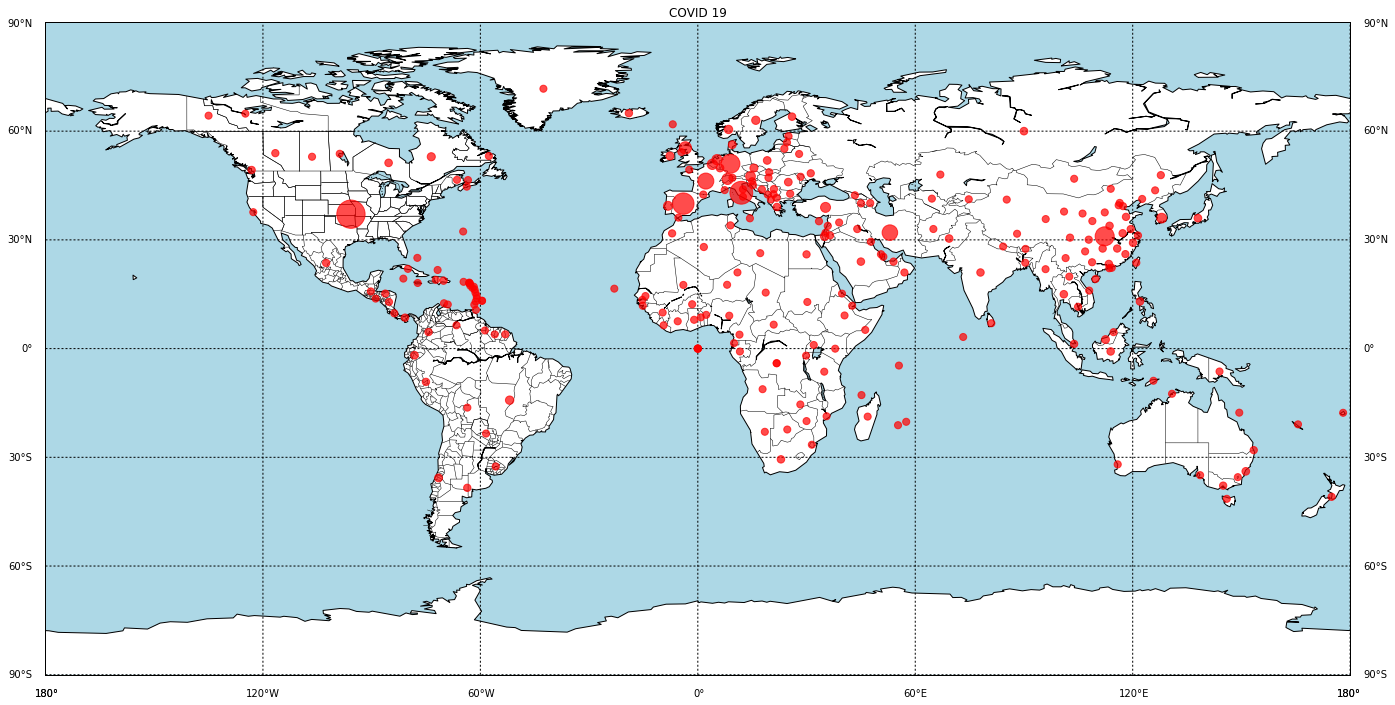

In [15]:
fig = plt.figure(num=None, figsize=(30,12))
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, urcrnrlon=180.,llcrnrlon=-180.,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='white',lake_color='lightblue')
m.drawparallels(np.arange(-90.,91.,30),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')

# Create a list of the latitudes and longitudes (x, y) coordinates
lat = list(confirmed_df['Lat'])
long = list(confirmed_df['Long'])

# Get latest date's values and scale between 2 values
plotSizes = confirmed_df.iloc[:,-1]

# Scale it
from sklearn.preprocessing import MinMaxScaler
minSize = 50
maxSize = 800
scaler = MinMaxScaler(feature_range=(minSize, maxSize))
plotSize = [ x[0] for x in list(scaler.fit_transform(plotSizes.values.reshape(-1,1)))]

m.scatter(long, lat, latlon=True, color='r', s=plotSize, zorder=5, alpha=0.7, edgecolors='r')




plt.title('COVID 19')
plt.show()



In [16]:
datePattern = re.compile("(\d{1,2}\/\d{1,2}\/\d{2,4})")  #pattern like 1/22/20
cols_to_keep = [ col for col in confirmed_df.columns if bool(re.match(datePattern, col)) ] +  ['Country/Region']

In [17]:
import plotly.express as px

latestData = list(deaths_subset_df.columns)[-1]
deaths_subset_df = deaths_subset_df.sort_values(by=latestData, ascending=True)


In [22]:
fig = px.bar(deaths_subset_df.tail(10), y="Country/Region", x=latestData, orientation='h', height=600,
             title='Deaths', text=latestData)

fig.update_traces(texttemplate='%{text:d}', textposition='outside')

fig.show()

In [19]:
recovered_subset_df = recovered_df_sum.iloc[:,[ 0,-1]]

print (recovered_subset_df)

         Country/Region  3/30/20
0           Afghanistan        2
1               Albania       44
2               Algeria       37
3               Andorra       10
4                Angola        0
..                  ...      ...
173           Venezuela       39
174             Vietnam       55
175  West Bank and Gaza       18
176              Zambia        0
177            Zimbabwe        0

[178 rows x 2 columns]


In [20]:
latestData = list(recovered_subset_df.columns)[-1]

recovered_subset_df = recovered_subset_df.sort_values(by=latestData, ascending=True)


In [21]:
fig = px.bar(recovered_subset_df.tail(15), y="Country/Region", x=latestData, orientation='h', height=600,
             title='Recovered', text=latestData)

fig.update_traces(texttemplate='%{text:d}', textposition='outside')

fig.show()

In [23]:
import pandas as pd
import requests

In [24]:
result = requests.get("http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/ZAF.json")

In [25]:
result.status_code

200

In [26]:
result.json()

[{'scenario': 'a2',
  'gcm': 'bccr_bcm2_0',
  'variable': 'tas',
  'monthVals': [21.57174932,
   21.47531875,
   20.37666165,
   18.21751124,
   14.41777319,
   11.47160059,
   10.54278128,
   12.26416576,
   15.35319301,
   17.92124223,
   19.56959565,
   20.75654758],
  'fromYear': 2020,
  'toYear': 2039},
 {'scenario': 'b1',
  'gcm': 'bccr_bcm2_0',
  'variable': 'tas',
  'monthVals': [21.42149197,
   21.36194221,
   20.49744026,
   18.30748515,
   14.30237315,
   11.28279332,
   10.62410067,
   11.90146808,
   15.41715225,
   18.37278841,
   19.67652737,
   20.99978825],
  'fromYear': 2020,
  'toYear': 2039},
 {'scenario': 'a2',
  'gcm': 'cccma_cgcm3_1',
  'variable': 'tas',
  'monthVals': [24.79832988,
   24.24732193,
   22.61413636,
   19.95269153,
   15.34996438,
   12.20509183,
   11.32843267,
   13.76033985,
   16.41286422,
   19.07810569,
   21.81929047,
   24.08986555],
  'fromYear': 2020,
  'toYear': 2039},
 {'scenario': 'b1',
  'gcm': 'cccma_cgcm3_1',
  'variable': 'tas',
 

In [27]:
from csv import reader


# open file in read mode
with open("C:\\Users\\tutun\\datasets\\UNSD.csv", "r") as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for column in csv_reader:
        # row variable is a list that represents a row in csv
        url = ("http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/"+ column[2] +".json") 
        print(url)
    

http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/ ISOALPHA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/AFG.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/ALA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/ALB.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/DZA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/ASM.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/AND.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/AGO.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/AIA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/ATA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/AT

In [28]:
import pandas as pd
from pandas.io.json import json_normalize
import requests

from csv import reader

full_weather_df = pd.DataFrame()
# open file in read mode
with open("C:\\Users\\tutun\\datasets\\UNSD.csv", "r") as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each column in the csv using reader object
    for column in csv_reader:
        # row variable is a list that represents a row in csv
        url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/"+  column[2] +".json"
        print(url)
        
        try:
            jsonData = requests.get(url).json()
        except:
            continue
        temp_df = json_normalize(jsonData[0])
        weather = pd.DataFrame(pd.Series(temp_df.loc[0,'monthVals'])).T
        
        temp_df = temp_df.drop(['monthVals'], axis=1).merge(weather, left_index=True, right_index=True)
        temp_df['Country/Region'] = column[0]
        
        full_weather_df = full_weather_df.append(temp_df, sort=False).reset_index(drop=True)


http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/ ISOALPHA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/AFG.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/ALA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/ALB.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/DZA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/ASM.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/AND.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/AGO.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/AIA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/ATA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/AT

http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/GIB.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/GRC.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/GRL.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/GRD.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/GLP.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/GUM.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/GTM.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/GGY.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/GIN.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/GNB.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/GUY.json

http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/MDA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/REU.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/ROU.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/RUS.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/RWA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/BLM.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/SHN.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/KNA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/LCA.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/MAF.json
http://climatedataapi.worldbank.org/climateweb/rest/v1/country/mavg/tas/2020/2039/SPM.json

In [55]:
monthDict = {0:'Jan',1:'Feb',2:'Mar',3:'Apr',4:'May',5:'June',6:'July',
             7:'Aug',8:'Sep',9:'Oct',10:'Nov',11:'Dec'}

        
full_weather_df = full_weather_df.rename(columns=monthDict)   

replaceDict = {'Bolivia (Plurinational State of)':'Bolivia', 
               'Brunei Darussalam':'Brunei', 
               'Congo':'Congo (Brazzaville)',
        'Côte d’Ivoire':"Cote d'Ivoire", 
       'Iran (Islamic Republic of)':'Iran', 
       'Russian Federation':'Russia', 
       'United States of America':'US',
       'United Republic of Tanzania':'Tanzania',
       'West Bank and Gaza':'Israel',
       'Holy See':'Italy',
       'Kosovo' :'Serbia',
       'Taiwan' :'China',      
       'Myanmar':'Burma',
       'Congo (Kinshasa)':'Democratic Repuplic of the Congo',    
       'Korea South':'South Korea',   
       'United Kingdom of Great Britain and Northern Ireland':'United Kingdom', 
       'Venezuela (Bolivarian Republic of)':'Venezuela', 
       'Viet Nam':'Vietnam'}

full_weather_df = full_weather_df.replace(replaceDict)

full_weather_df.head(12)

,scenario,gcm,variable,fromYear,toYear,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Country/Region
0,a2,bccr_bcm2_0,tas,2020,2039,-2.767197,-0.548585,4.159680,10.806025,16.378755,21.386592,23.972859,22.538873,17.729663,11.322484,4.798174,-0.630866,Afghanistan
1,a2,bccr_bcm2_0,tas,2020,2039,3.984985,3.737366,5.609039,10.048635,15.606720,21.493744,24.566467,24.313466,18.514252,13.195099,8.677063,5.584178,Albania
2,a2,bccr_bcm2_0,tas,2020,2039,7.798780,10.173181,15.925639,20.598157,24.878645,29.178544,31.519017,30.609523,27.256208,21.836153,15.321733,10.397603,Algeria
3,a2,bccr_bcm2_0,tas,2020,2039,27.423187,27.260406,27.377045,27.453857,27.098969,26.331512,25.636108,25.410919,25.830383,26.511078,27.047089,27.475311,American Samoa
4,a2,bccr_bcm2_0,tas,2020,2039,6.841522,7.071167,8.829193,11.092346,14.196716,18.138763,21.115906,20.722748,18.157959,13.944061,9.861420,8.562256,Andorra
5,a2,bccr_bcm2_0,tas,2020,2039,21.021239,21.281476,21.836814,21.897290,20.580410,19.324929,19.094606,20.922540,23.536807,23.783626,22.236418,21.290587,Angola
6,a2,bccr_bcm2_0,tas,2020,2039,24.211899,23.578949,23.490540,23.978729,24.801117,25.462036,26.384842,27.164673,27.367188,26.886047,26.170227,25.129028,Anguilla
7,a2,bccr_bcm2_0,tas,2020,2039,24.081802,23.449020,23.337967,23.764664,24.523590,25.198349,26.145645,26.947021,27.176880,26.731369,26.084290,25.025253,Antigua and Barbuda
8,a2,bccr_bcm2_0,tas,2020,2039,20.425845,20.170564,18.034764,14.207169,9.900703,6.985090,6.561861,7.949311,10.384039,13.120860,16.588035,19.280082,Argentina
9,a2,bccr_bcm2_0,tas,2020,2039,-2.632306,-2.521216,-0.622736,3.916010,10.735815,17.438586,20.433374,19.481543,14.898810,9.178943,3.592609,-0.523157,Armenia


In [47]:
confirmed_df2 = confirmed_df_sum.melt(id_vars=["Country/Region"], 
        var_name="Date", 
        value_name="Confirmed")

recovered_df2 = recovered_df_sum.melt(id_vars=["Country/Region"], 
        var_name="Date", 
        value_name="Recovered")

deaths_df2 = deaths_df_sum.melt(id_vars=["Country/Region"], 
        var_name="Date", 
        value_name="Deaths")

full_df3 = confirmed_df2.merge(recovered_df2, how='left', on=['Country/Region', 'Date'])

full_df3 = full_df3.merge(deaths_df2, how='left', on=['Country/Region', 'Date'])
full_df3 = full_df3.merge(confirmed_df[['Country/Region', 'Lat', 'Long']], how='left', on='Country/Region')

full_df3 = full_df3.drop_duplicates(subset=['Country/Region', 'Date'])

full_df3.head(100)

,Country/Region,Date,Confirmed,Recovered,Deaths,Lat,Long
0,Afghanistan,1/22/20,0,0,0,33.0000,65.000000
1,Albania,1/22/20,0,0,0,41.1533,20.168300
2,Algeria,1/22/20,0,0,0,28.0339,1.659600
3,Andorra,1/22/20,0,0,0,42.5063,1.521800
4,Angola,1/22/20,0,0,0,-11.2027,17.873900
...,...,...,...,...,...,...,...
159,Lebanon,1/22/20,0,0,0,33.8547,35.862300
160,Liberia,1/22/20,0,0,0,6.4281,-9.429500
161,Libya,1/22/20,0,0,0,26.3351,17.228331
162,Liechtenstein,1/22/20,0,0,0,47.1400,9.550000


In [48]:
full_df = full_df3.merge(full_weather_df, how='left', on=['Country/Region'])

full_df.head(20)

,Country/Region,Date,Confirmed,Recovered,Deaths,Lat,Long,scenario,gcm,variable,...,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
0,Afghanistan,1/22/20,0,0,0,33.0000,65.0000,a2,bccr_bcm2_0,tas,...,4.159680,10.806025,16.378755,21.386592,23.972859,22.538873,17.729663,11.322484,4.798174,-0.630866
1,Albania,1/22/20,0,0,0,41.1533,20.1683,a2,bccr_bcm2_0,tas,...,5.609039,10.048635,15.606720,21.493744,24.566467,24.313466,18.514252,13.195099,8.677063,5.584178
2,Algeria,1/22/20,0,0,0,28.0339,1.6596,a2,bccr_bcm2_0,tas,...,15.925639,20.598157,24.878645,29.178544,31.519017,30.609523,27.256208,21.836153,15.321733,10.397603
3,Andorra,1/22/20,0,0,0,42.5063,1.5218,a2,bccr_bcm2_0,tas,...,8.829193,11.092346,14.196716,18.138763,21.115906,20.722748,18.157959,13.944061,9.861420,8.562256
4,Angola,1/22/20,0,0,0,-11.2027,17.8739,a2,bccr_bcm2_0,tas,...,21.836814,21.897290,20.580410,19.324929,19.094606,20.922540,23.536807,23.783626,22.236418,21.290587
5,Antigua and Barbuda,1/22/20,0,0,0,17.0608,-61.7964,a2,bccr_bcm2_0,tas,...,23.337967,23.764664,24.523590,25.198349,26.145645,26.947021,27.176880,26.731369,26.084290,25.025253
6,Argentina,1/22/20,0,0,0,-38.4161,-63.6167,a2,bccr_bcm2_0,tas,...,18.034764,14.207169,9.900703,6.985090,6.561861,7.949311,10.384039,13.120860,16.588035,19.280082
7,Armenia,1/22/20,0,0,0,40.0691,45.0382,a2,bccr_bcm2_0,tas,...,-0.622736,3.916010,10.735815,17.438586,20.433374,19.481543,14.898810,9.178943,3.592609,-0.523157
8,Australia,1/22/20,0,0,0,-35.4735,149.0124,a2,bccr_bcm2_0,tas,...,24.927437,22.580899,19.104645,15.799183,14.958577,16.420872,19.132238,22.295608,24.703913,25.746593
9,Austria,1/22/20,0,0,0,47.5162,14.5501,a2,bccr_bcm2_0,tas,...,0.371721,4.959678,11.697690,16.470623,19.194705,17.631617,12.415749,7.740764,2.770494,0.686462


In [56]:
full_df[full_df.isna().any(axis=1)]['Country/Region'].unique()


array(['Congo (Kinshasa)', 'Diamond Princess', 'Holy See', 'Korea, South',
       'Kosovo', 'Laos', 'MS Zaandam', 'Moldova', 'Syria', 'Taiwan*',
       'West Bank and Gaza'], dtype=object)

In [33]:
full_df.shape

(12282, 24)